# Linear Regression Example: Predicting Housing Prices

<script>
    console.log("Hello. You'll see this printed in your browser's DevTools / Console. Feel free to delete this line.");
    document.querySelector('head').innerHTML += '<style>.slides { zoom: 1.5 !important; }</style>';
</script>

In [1]:
import os

import matplotlib
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

pd.options.display.max_columns = 999

NOTEBOOK_PATH = os.path.dirname(os.path.realpath("__file__"))
OUTPUT_PATH = os.path.join(NOTEBOOK_PATH, '..', 'output')
DATA_PATH = os.path.join(NOTEBOOK_PATH, '..', 'src')

# Loading Data

In [2]:
df = pd.read_excel(os.path.join(DATA_PATH, 'sales_price_slc.xlsx'))
predictors = ['Square Footage', 'Bedrooms', 'Bathrooms']
outcome = ['Price']

## Descriptive Statistics

In [3]:
df.head()

,Address,Square Footage,Bedrooms,Bathrooms,Price
0,"241 N Vine St Unit 303w, Salt Lake City, UT 84103",1385,2,2.0,450000
1,"7 S 1200 East, Salt Lake City, UT 84102",3259,3,2.5,850000
2,"458 N 800 W, Salt Lake City, UT 84116",2775,6,2.0,551000
3,"2125 S Wellington St, Salt Lake City, UT 84106",1634,4,2.0,620000
4,"454 N 800 W, Salt Lake City, UT 84116",2775,6,2.0,585000


In [4]:
df.describe()

,Square Footage,Bedrooms,Bathrooms,Price
count,49.000000,49.000000,49.000000,4.900000e+01
mean,1871.204082,3.367347,2.020408,6.646663e+05
std,744.756895,1.302144,0.864275,2.538991e+05
min,657.000000,1.000000,1.000000,2.750000e+05
25%,1385.000000,2.000000,1.000000,4.500000e+05
50%,1716.000000,3.000000,2.000000,6.283000e+05
75%,2321.000000,4.000000,2.000000,7.886000e+05
max,3650.000000,6.000000,4.250000,1.385000e+06


In [5]:
# Checking for missing values
# In this case, there are no missing values!
df.isna().sum()

Address           0
Square Footage    0
Bedrooms          0
Bathrooms         0
Price             0
dtype: int64

## Descriptive Graphs

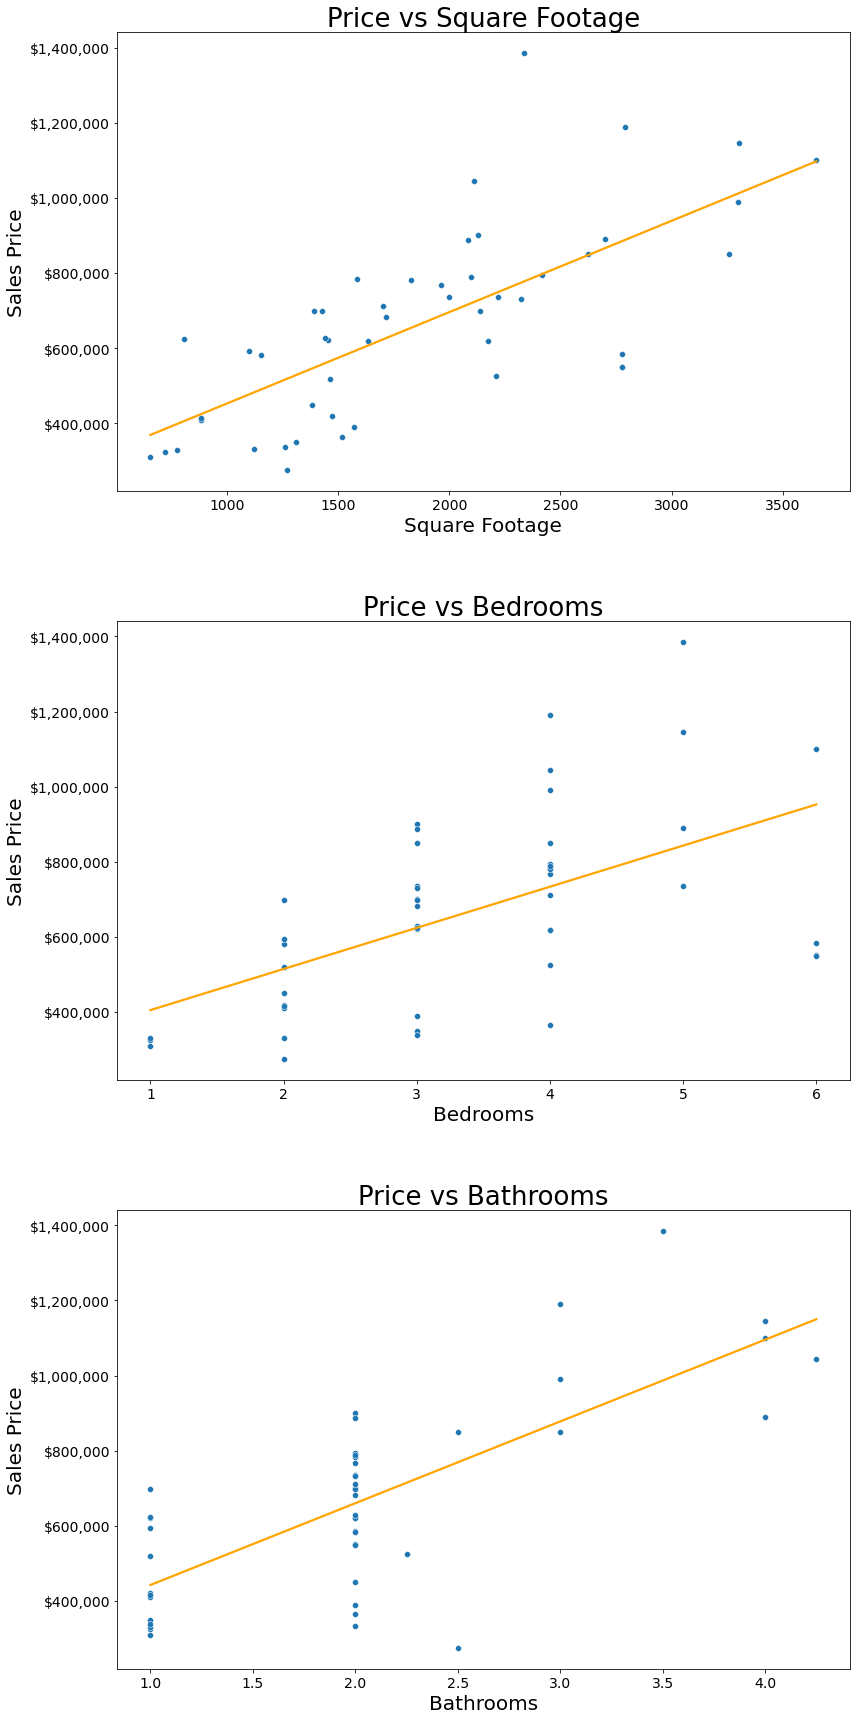

In [15]:
fig, ax_lst = plt.subplots(nrows=3, ncols=1, figsize=(12, 24))

# Draw Scatter Plot
for idx, ax in enumerate(ax_lst):
    sns.scatterplot(data=df, x=predictors[idx], y='Price', ax=ax)
    
    sns.regplot(data=df, x=predictors[idx], y='Price', ci=None, ax=ax, color='orange', scatter=False)
    
    # Adjust Labels
    ax.set_ylabel('Sales Price', fontsize=20)
    ax.set_xlabel(predictors[idx], fontsize=20)
    ax.set_title('Price vs {}'.format(predictors[idx]), fontsize=26)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    # Set Y axis to Dollars
    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick) 

plt.tight_layout(h_pad=6)
plt.show()

# Linear Model using Scikit-Learn
Scikit-learn is a popular Python library for machine learning. For more information, see: https://scikit-learn.org/

In [7]:
# That's it! You've now fit a linear regression. That's all you need to do!
reg = LinearRegression().fit(df[predictors], df[outcome])

In [8]:
# Let's see what the model predicts for our houses
df['Predicted Price'] = reg.predict(df[predictors])

In [9]:
def get_predicted_value(test_address):
    return '${:,.2f}'.format(df.loc[df.Address==test_address]['Predicted Price'].iloc[0])

## 1832 S 1100 E, Salt Lake City, UT 84105 
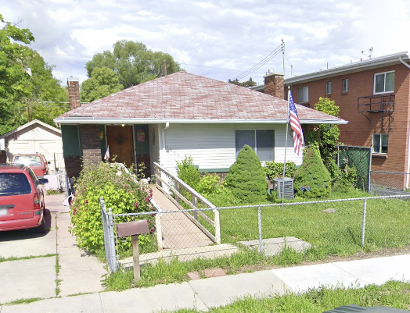

In [10]:
test_address = '1832 S 1100 E, Salt Lake City, UT 84105'
get_predicted_value(test_address)

'$470,976.92'

## 7 S 1200 East, Salt Lake City, UT 84102
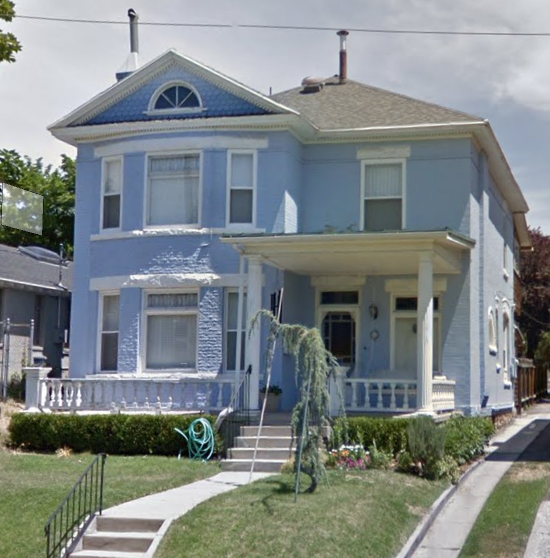

In [11]:
test_address = '7 S 1200 East, Salt Lake City, UT 84102'
get_predicted_value(test_address)

'$924,875.98'

## 1589 S 1500 E, Salt Lake City, UT 84105
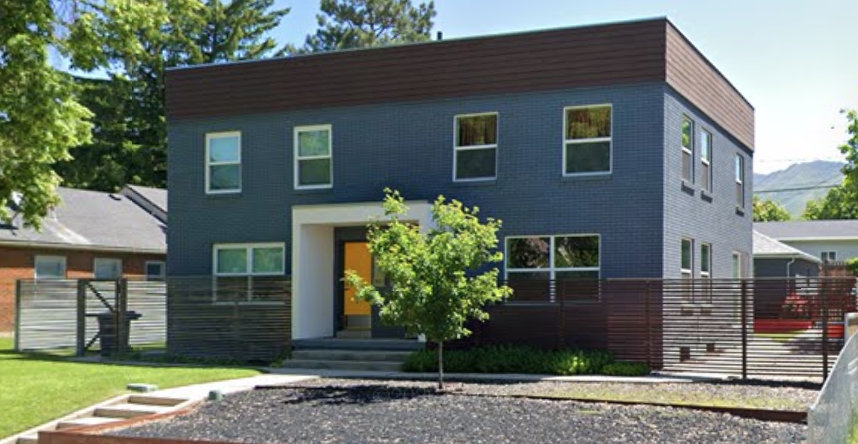

In [12]:
test_address = '1589 S 1500 E, Salt Lake City, UT 84105'
get_predicted_value(test_address)

'$920,013.60'